<a href="https://colab.research.google.com/github/AriyantGit/Laprop_price_regression/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Import necessary module")

Import necessary module


In [3]:
dataset_url=r"https://raw.githubusercontent.com/AriyantGit/Laprop_price_regression/main/laptop_data.csv"
df=pd.read_csv(dataset_url)

In [4]:
laptop_df=df.copy()
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["Unnamed: 0"],inplace=True,axis=1)

In [10]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [11]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [12]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [13]:
df["Weight"]=df["Weight"].astype("float32")
df["Ram"]=df["Ram"].astype("int32")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Text(0.5, 0, 'Price')

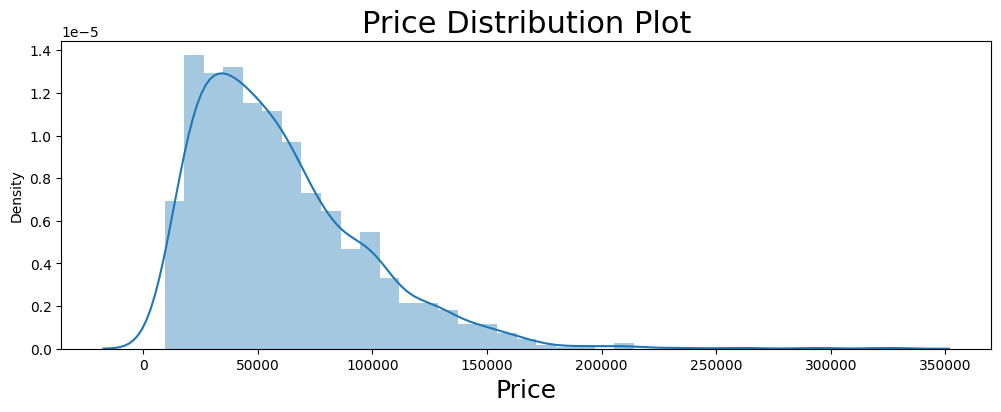

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(df["Price"])
plt.title("Price Distribution Plot",size=22)
plt.xlabel("Price",size=18)

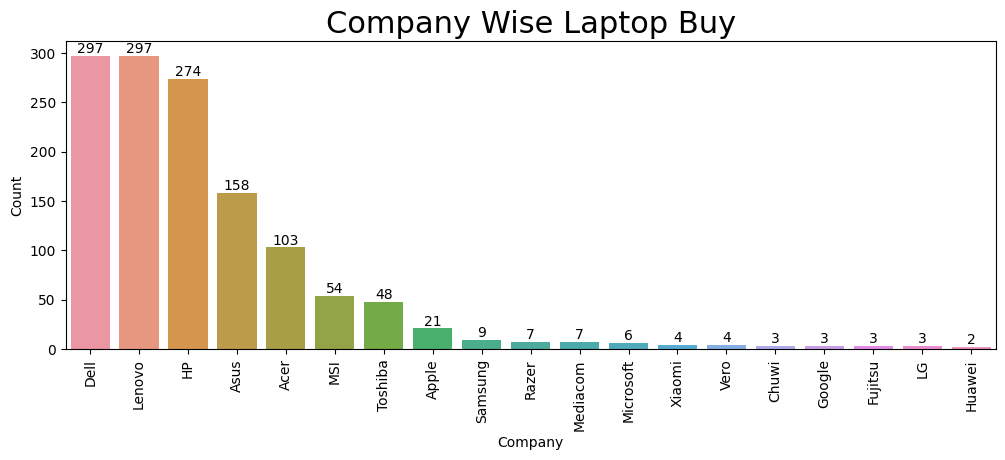

In [16]:
plt.figure(figsize=(12,4))
company_with_count=pd.DataFrame(df["Company"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Company","Company":"Count"},inplace=True)
bar=sns.barplot(x="Company",y="Count",data=company_with_count)
for label in bar.containers:
    bar.bar_label(label)
plt.title("Company Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

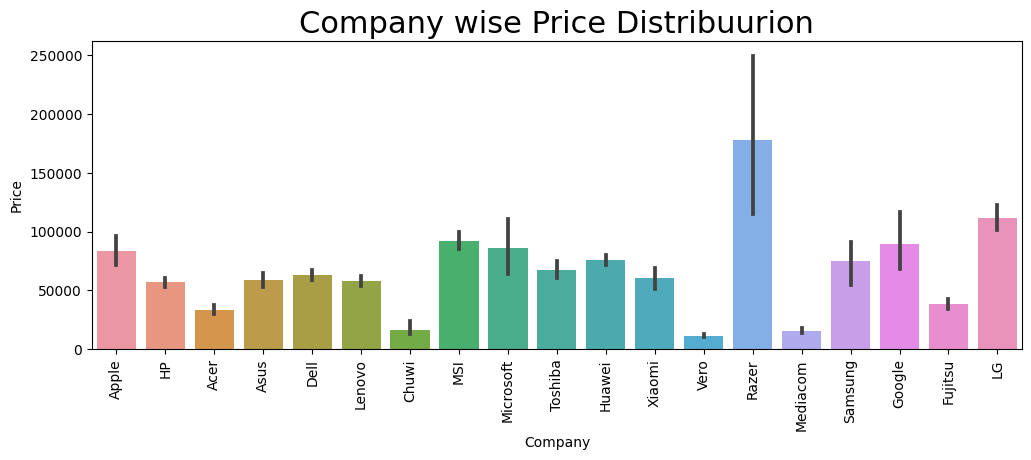

In [17]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["Company"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Company wise Price Distribuurion",size=22)
plt.show()


In [18]:
df["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

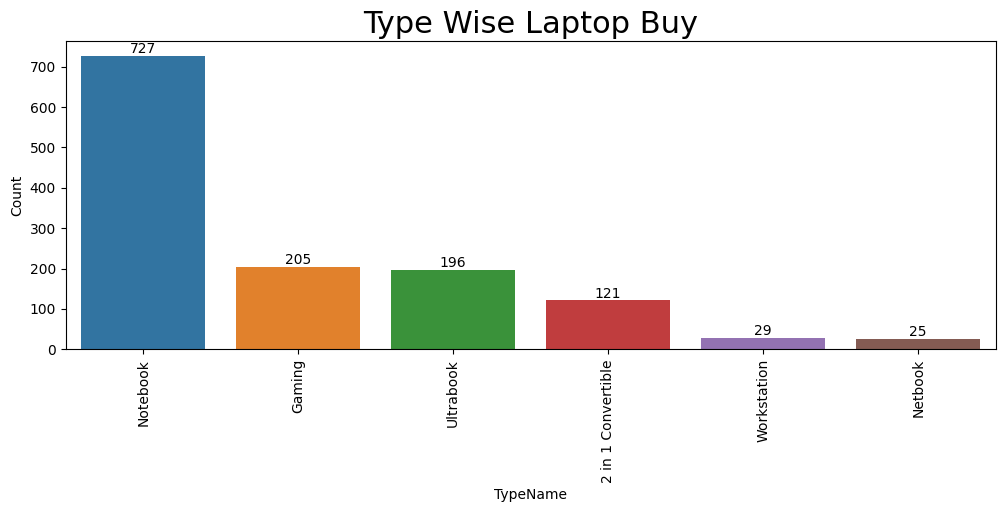

In [19]:
plt.figure(figsize=(12,4))
company_with_count=pd.DataFrame(df["TypeName"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"TypeName","TypeName":"Count"},inplace=True)
bar=sns.barplot(x="TypeName",y="Count",data=company_with_count)
for label in bar.containers:
    bar.bar_label(label)
plt.title("Type Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

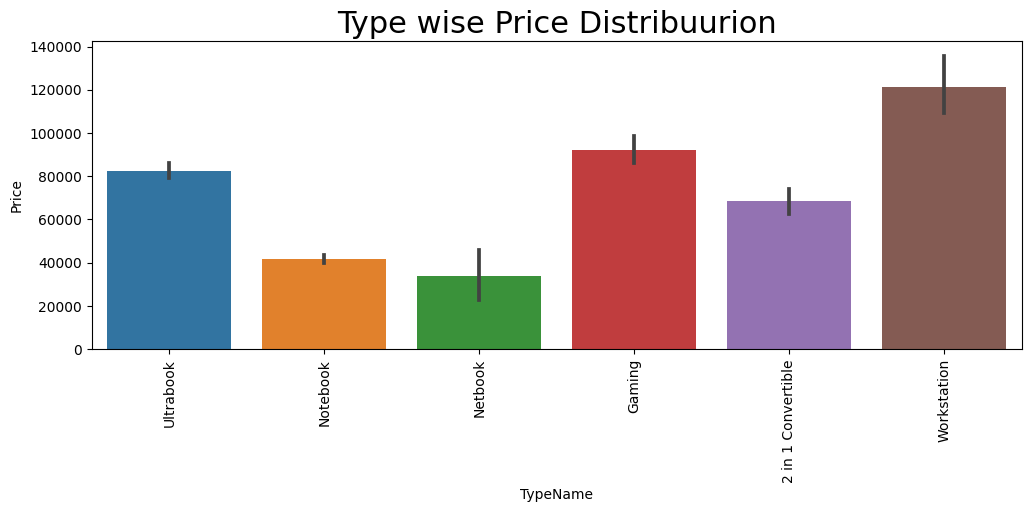

In [20]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["TypeName"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Type wise Price Distribuurion",size=22)
plt.show()

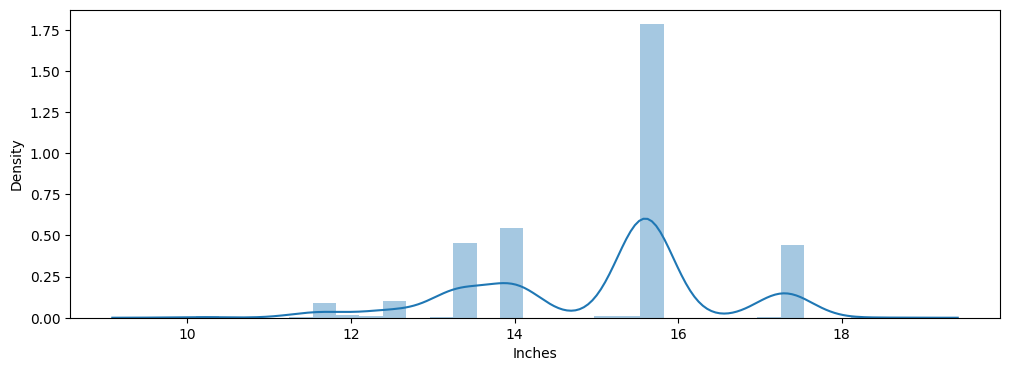

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(df["Inches"])
plt.show()

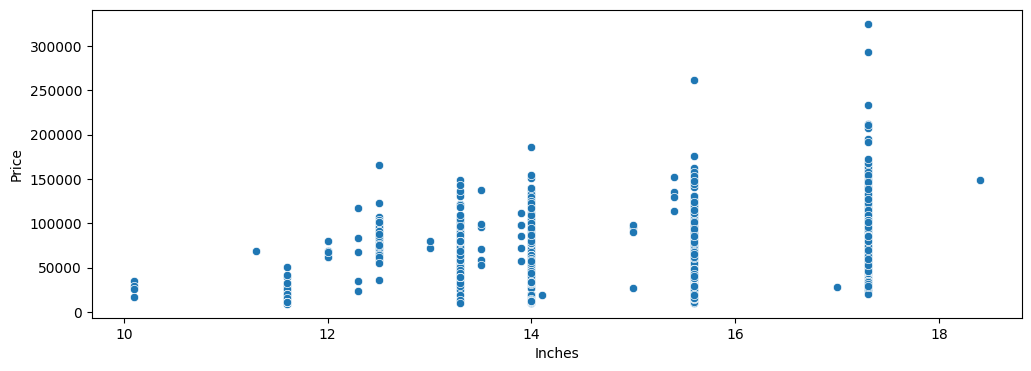

In [22]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=df["Inches"],y=df["Price"])
plt.show()

In [23]:
df["TouchScreen"]=df["ScreenResolution"].apply(lambda x:1 if "touchscreen" in x.lower() else 0)

In [24]:
df["TouchScreen"].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

[<BarContainer object of 2 artists>]


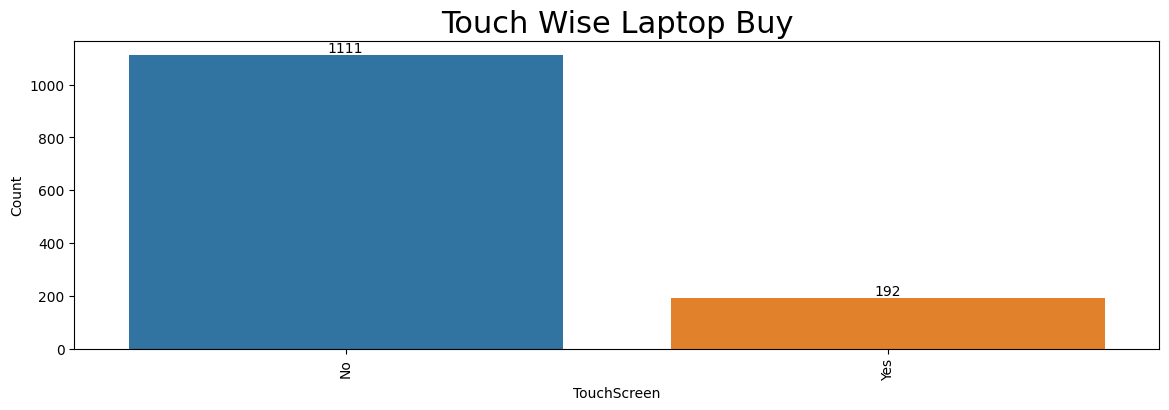

In [25]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["TouchScreen"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"TouchScreen","TouchScreen":"Count"},inplace=True)
company_with_count["TouchScreen"]=company_with_count["TouchScreen"].apply(lambda x:"Yes" if x==1 else "No")
bar=sns.barplot(x="TouchScreen",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Touch Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

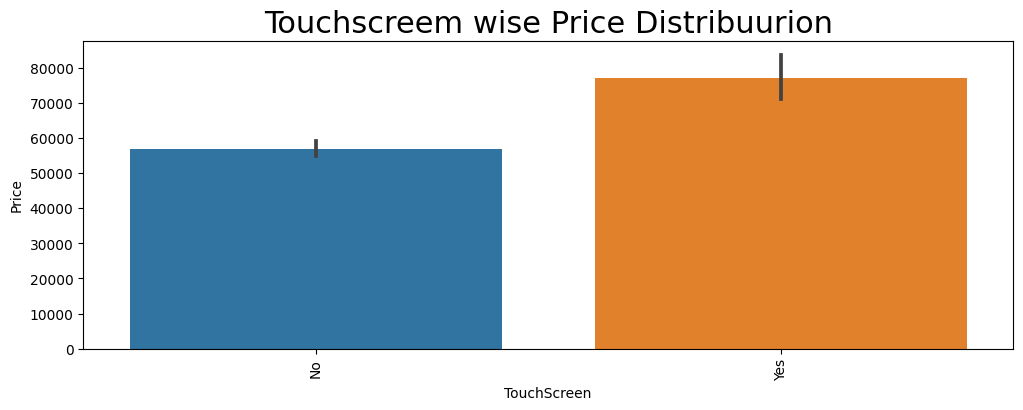

In [26]:
touch_price=df[["TouchScreen","Price"]]
touch_price["TouchScreen"]=touch_price["TouchScreen"].apply(lambda x:"Yes" if x==1 else "No")
touch_price.sample(5)


plt.figure(figsize=(12,4))

plot=sns.barplot(x=touch_price["TouchScreen"],y=touch_price["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Touchscreem wise Price Distribuurion",size=22)
plt.show()

In [27]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

[<BarContainer object of 2 artists>]


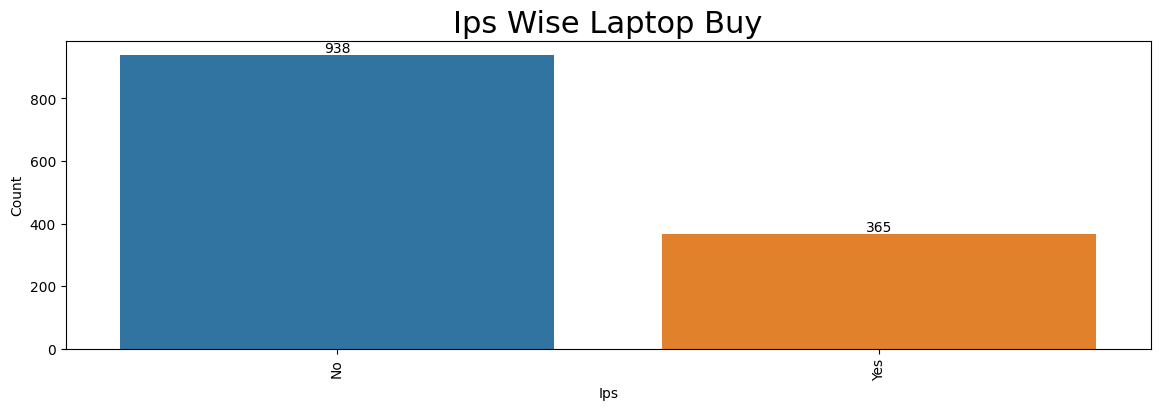

In [28]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["Ips"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Ips","Ips":"Count"},inplace=True)
company_with_count["Ips"]=company_with_count["Ips"].apply(lambda x:"Yes" if x==1 else "No")
bar=sns.barplot(x="Ips",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Ips Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

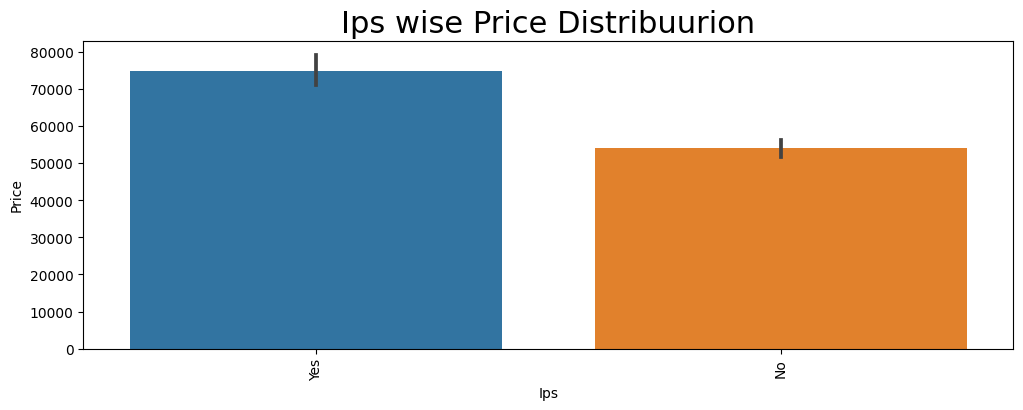

In [29]:
ips_price=df[["Ips","Price"]]
ips_price["Ips"]=ips_price["Ips"].apply(lambda x:"Yes" if x==1 else "No")
ips_price.sample(5)


plt.figure(figsize=(12,4))

plot=sns.barplot(x=ips_price["Ips"],y=ips_price["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Ips wise Price Distribuurion",size=22)
plt.show()

In [30]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
new[0]=new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [32]:
df["X_resolution"]=new[0].astype("int64")
df["Y_resolution"]=new[1].astype("int64")
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   int64  
 14  Y_resolution      1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [34]:
df.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [35]:
df["PPI"]=((df["X_resolution"]**2+df["Y_resolution"]**2)**0.5)/df["Inches"].astype("float")

In [36]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [37]:
df.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [38]:
df.drop(columns=['Y_resolution',"X_resolution","Inches",'ScreenResolution'],inplace=True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [40]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [41]:
df["Processor"]=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
df["Processor"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [44]:
def processor_find(name):
  if name in("Intel Core i5","Intel Core i7","Intel Core i3"):
    return name
  elif "Intel" in name.split():
    return "Other Intel Prcessor"
  else:
    return "AMD Prcessor"

In [45]:
df['Processor']=df['Processor'].apply(processor_find)

In [46]:
df["Processor"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Prcessor', 'Intel Core i3',
       'Other Intel Prcessor'], dtype=object)

[<BarContainer object of 5 artists>]


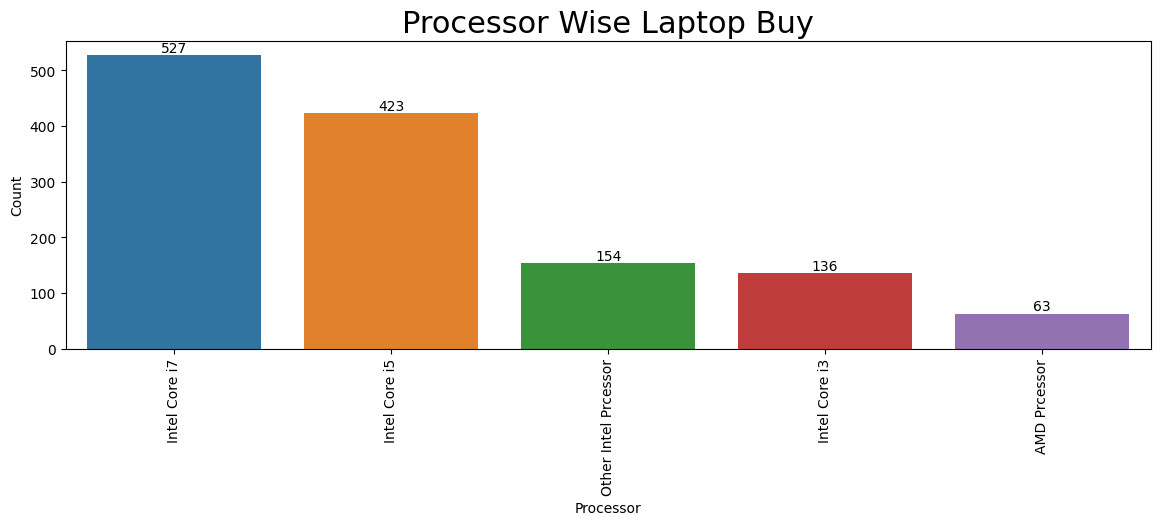

In [47]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["Processor"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Processor","Processor":"Count"},inplace=True)
bar=sns.barplot(x="Processor",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Processor Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

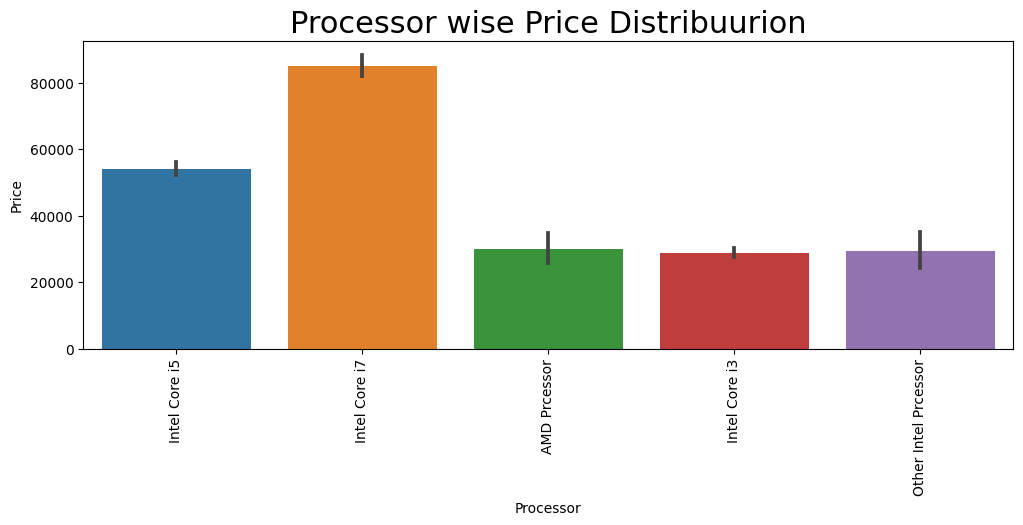

In [48]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["Processor"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Processor wise Price Distribuurion",size=22)
plt.show()

In [49]:
df.drop(columns="Cpu",inplace=True)

[<BarContainer object of 9 artists>]


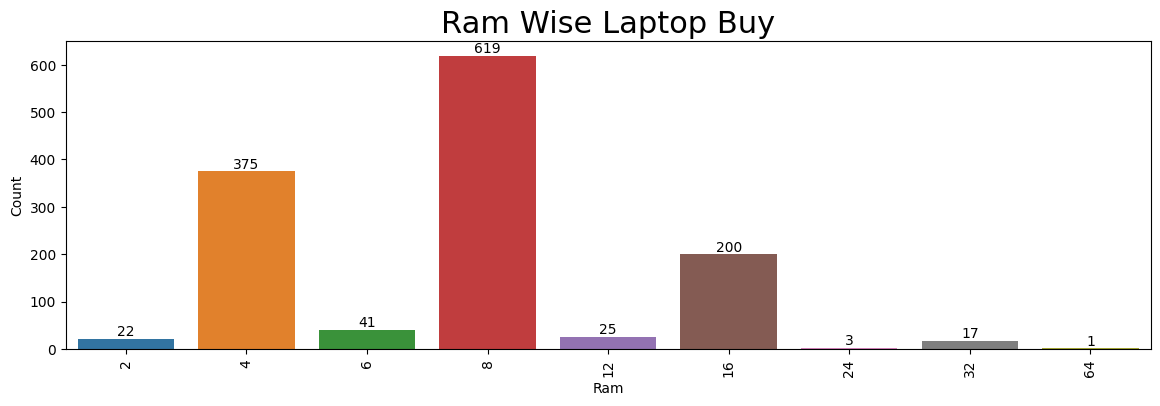

In [50]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["Ram"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Ram","Ram":"Count"},inplace=True)
company_with_count=company_with_count.sort_values(by="Count",ascending=False)
bar=sns.barplot(x="Ram",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Ram Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

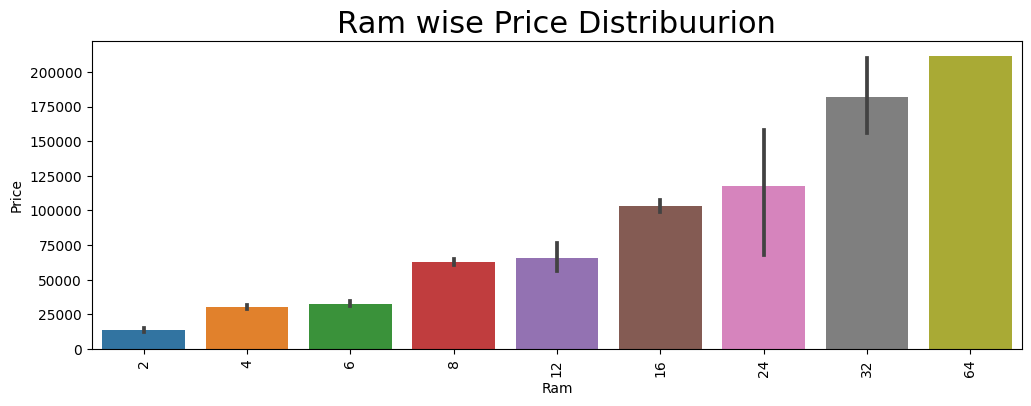

In [51]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["Ram"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Ram wise Price Distribuurion",size=22)
plt.show()

In [52]:
df['Memory']=df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory']=df['Memory'].str.replace("GB","")
df['Memory']=df['Memory'].str.replace("TB","000")

In [53]:
new=df["Memory"].str.split("+",n=1,expand=True)

In [54]:
df["first"]=new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [55]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
346,HP,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.44,14865.12,0,0,111.935204,Other Intel Prcessor,0,0,0,32
1258,Lenovo,Notebook,8,1000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.60,0,0,141.211998,Intel Core i7,0,0,1000,0
217,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.68,0,0,157.350512,Intel Core i7,0,256,0,0
599,Dell,Workstation,8,256 SSD,Nvidia Quadro M620,Windows 10,2.06,93932.64,1,0,141.211998,Intel Core i7,0,256,0,0
984,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751.20,0,0,111.935204,Intel Core i5,500,0,0,0


In [56]:
df.drop(columns="Memory",inplace=True)

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [58]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [59]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [60]:
df["Gpu_Brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [62]:
df.drop(columns="Gpu",inplace=True)

In [63]:
df["Gpu_Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [64]:
df=df[df["Gpu_Brand"]!="ARM"]

[<BarContainer object of 3 artists>]


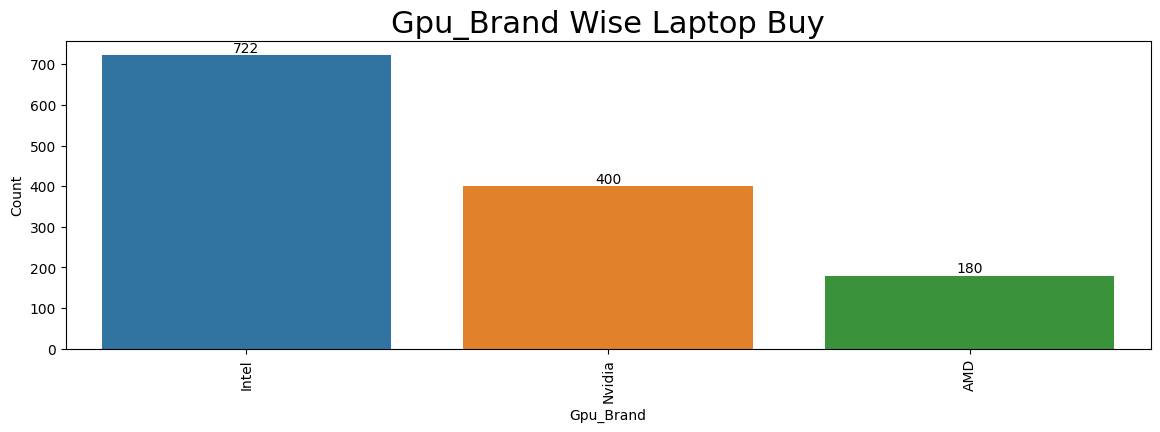

In [65]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["Gpu_Brand"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"Gpu_Brand","Gpu_Brand":"Count"},inplace=True)
company_with_count=company_with_count.sort_values(by="Count",ascending=False)
bar=sns.barplot(x="Gpu_Brand",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Gpu_Brand Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

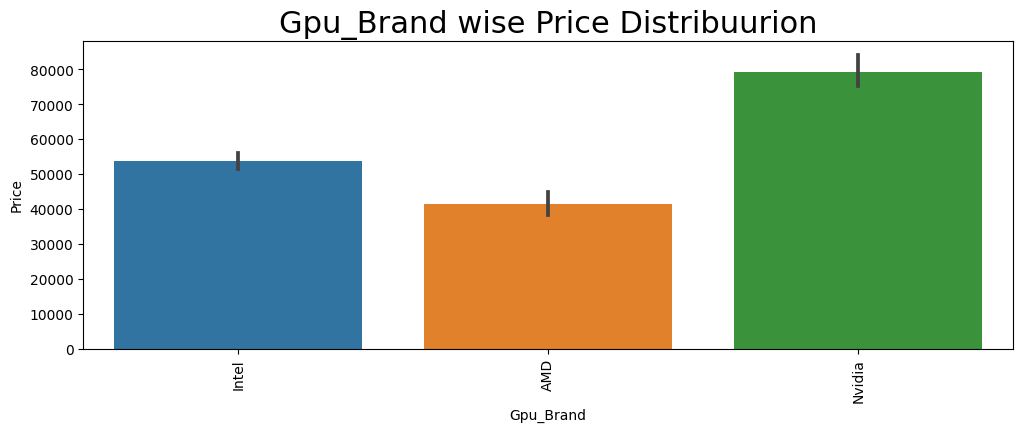

In [66]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["Gpu_Brand"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Gpu_Brand wise Price Distribuurion",size=22)
plt.show()

In [67]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


[<BarContainer object of 9 artists>]


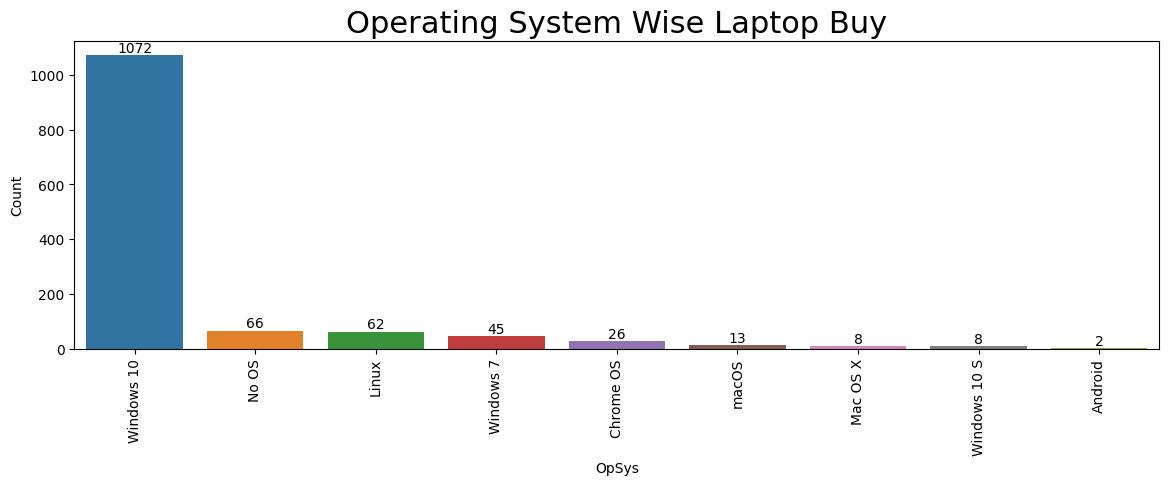

In [68]:
plt.figure(figsize=(14,4))
company_with_count=pd.DataFrame(df["OpSys"].value_counts()).reset_index()
company_with_count.rename(columns={"index":"OpSys","OpSys":"Count"},inplace=True)
company_with_count=company_with_count.sort_values(by="Count",ascending=False)
bar=sns.barplot(x="OpSys",y="Count",data=company_with_count)
print(bar.containers)
for label in bar.containers:
  bar.bar_label(label)
plt.title("Operating System Wise Laptop Buy",size=22)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

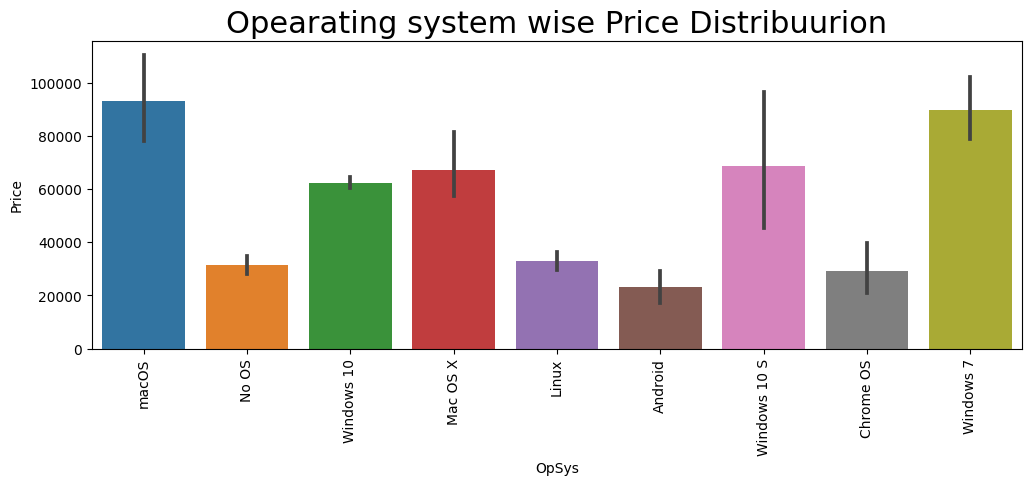

In [69]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["OpSys"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Opearating system wise Price Distribuurion",size=22)
plt.show()

In [70]:
def os_category(inp):
  if inp in ["Windows 10","Windows 10 S","Windows 7"]:
    return "Windows"
  elif inp in ["macOS","Mac OS X","Windows 7"]:
    return "Mac"
  else:
    return "Others/No-Os/Linux"


In [71]:
df["OS"]=df["OpSys"].apply(os_category)

In [72]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No-Os/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


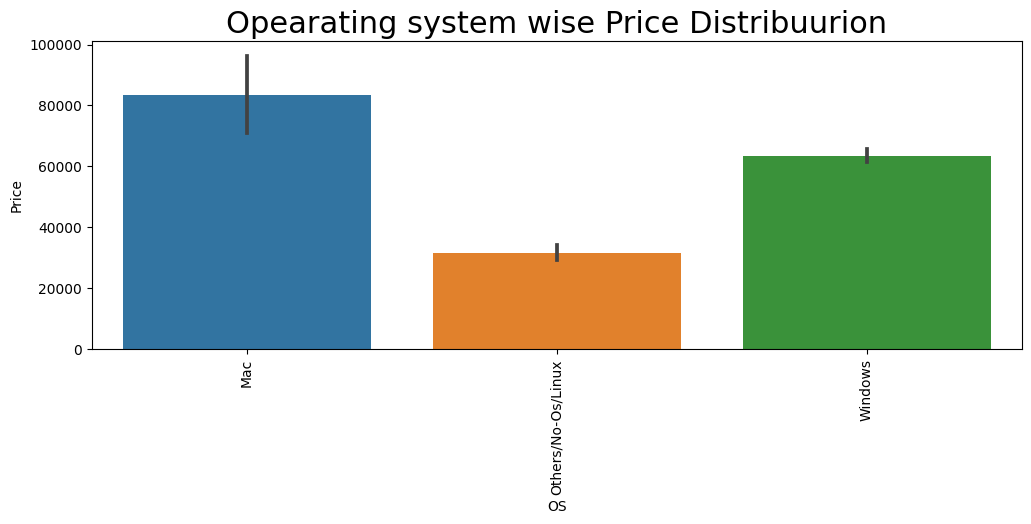

In [73]:
plt.figure(figsize=(12,4))
plot=sns.barplot(x=df["OS"],y=df["Price"])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title("Opearating system wise Price Distribuurion",size=22)
plt.show()

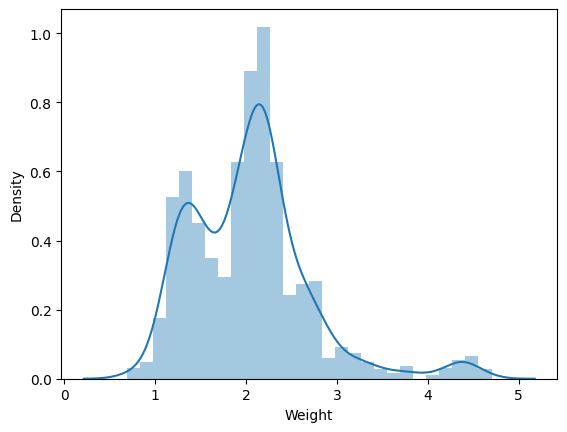

In [77]:
sns.distplot(df["Weight"])
plt.show()

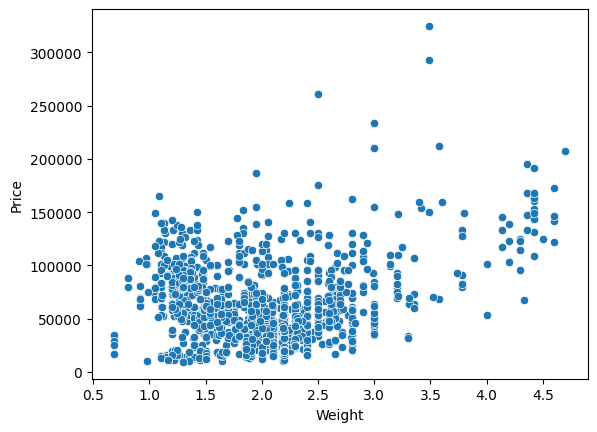

In [78]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

In [79]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
Ips            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

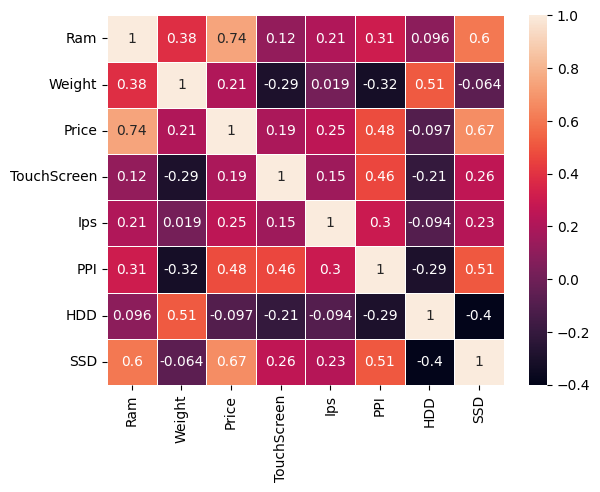

In [81]:
sns.heatmap(df.corr(),annot=True, linewidth=.5)

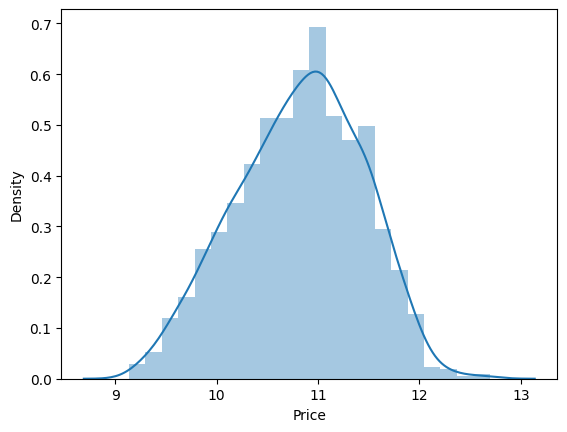

In [83]:
sns.distplot(np.log(df["Price"]))
plt.show()

In [85]:
df.drop(columns="OpSys",inplace=True)

In [86]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,PPI,Processor,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No-Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [88]:
X=df.drop(columns=["Price"])
y=np.log(df["Price"])

In [93]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [91]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8002405966123032
MAE 0.20453995815619838


ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 1, 7, 10, 11])])